<a href="https://colab.research.google.com/github/Jmakawuor/Artifial-Neural-Networks/blob/main/Deep_Neural_Network_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv('/content/bank.csv')

# Basic info
print(df.info())
print(df.describe())
print(df['deposit'].value_counts())  # Target variable check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
                age       balance           day      duration      campaign  \
count  11162.00

In [5]:
#data cleaning and pre processing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copy dataset to avoid modifying original
df_clean = df.copy()

# Encode categorical features
categorical_cols = df_clean.select_dtypes(include='object').columns.drop('deposit')

le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# Encode target variable
df_clean['deposit'] = df_clean['deposit'].map({'yes': 1, 'no': 0})

# Scale numerical features
scaler = StandardScaler()
num_cols = df_clean.select_dtypes(include='number').columns.drop('deposit')
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])


In [6]:
#Build Deep Learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Split data
X = df_clean.drop('deposit', axis=1)
y = df_clean['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6505 - loss: 0.6179 - val_accuracy: 0.8057 - val_loss: 0.4443
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7991 - loss: 0.4445 - val_accuracy: 0.8147 - val_loss: 0.4307
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8109 - loss: 0.4240 - val_accuracy: 0.8158 - val_loss: 0.4260
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.3930 - val_accuracy: 0.8108 - val_loss: 0.4263
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8289 - loss: 0.3975 - val_accuracy: 0.8135 - val_loss: 0.4223
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8277 - loss: 0.3969 - val_accuracy: 0.8186 - val_loss: 0.4241
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8211 - loss: 0.3969 - val_accuracy: 0.8169 - val_loss: 0.4181
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8330 - loss: 0.3801 - val_accuracy: 0.

In [7]:
#model Evaluation
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')



70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4720
Test Accuracy: 0.80


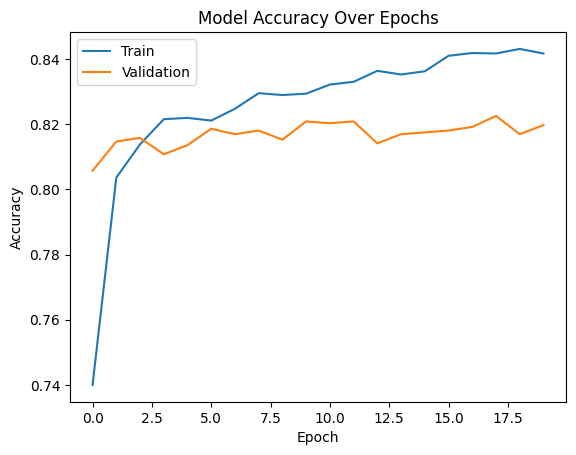

In [8]:
#Model Vizualization
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
